-- Introduction and Problem Statement:

This task involves predicting medical insurance charges based on personal attributes like age, BMI, and smoking status using linear regression.

-- Dataset Understanding and Description:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')  # Make sure 'insurance.csv' is in your working directory

# Show structure
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Shape: (1338, 7)
Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


-- Data Cleaning and Preparation

In [2]:
# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


--Exploratory Data Analysis (EDA)

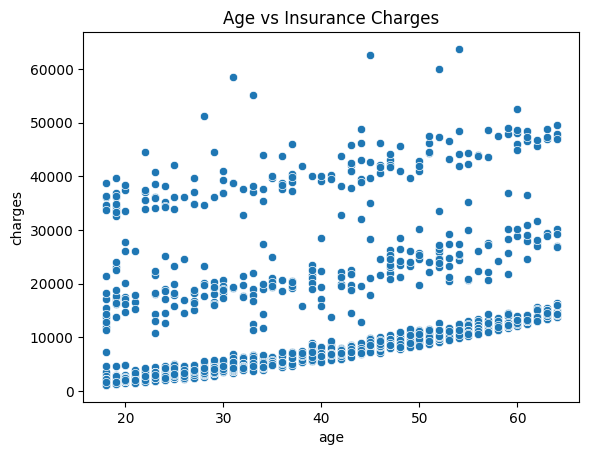

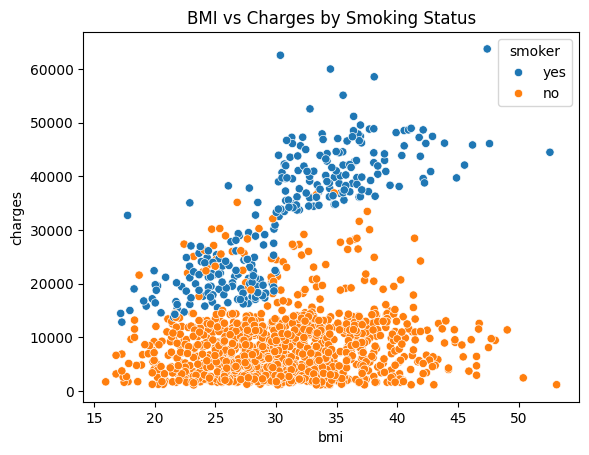

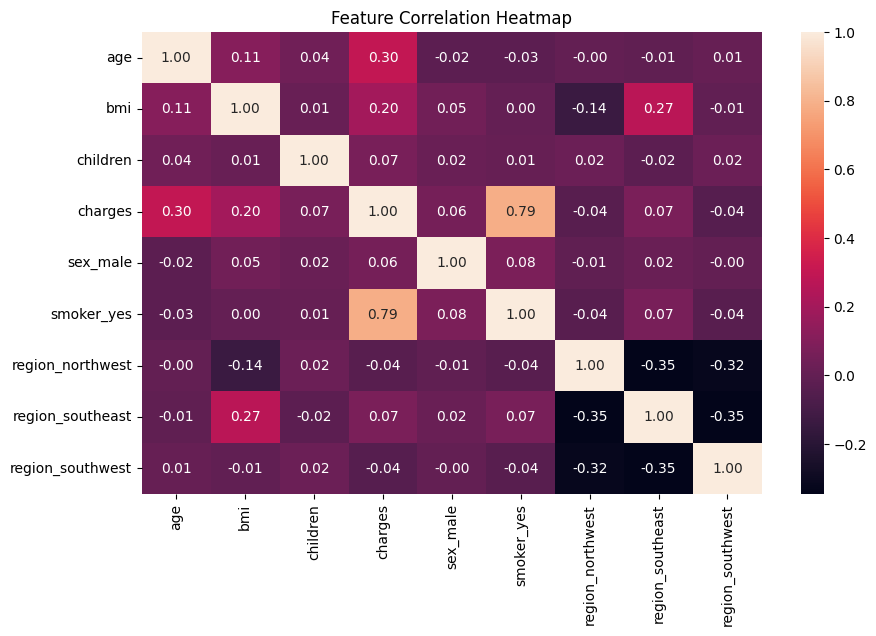

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age vs Charges
sns.scatterplot(data=df, x='age', y='charges')
plt.title("Age vs Insurance Charges")
plt.show()

# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("BMI vs Charges by Smoking Status")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

-- Model Training and Testing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

-- Evaluation Metrics

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4181.194473753654
Root Mean Squared Error (RMSE): 5796.2846592762735


-- Conclusion

- The model was able to learn from features like age, BMI, and smoking status.
- Smoking status had a significant impact on insurance charges.
- Linear Regression gives a reasonable estimate but may be improved with more advanced models.